In [30]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define the vocabulary and document
vocabulary = ["document", "this", "here", "one", "is", "yet", "another", "third", "second", "and", "the", "first"]
document = ["this", "document", "is", "the", "second", "cool", "document"]

encoder = OneHotEncoder(sparse_output=False)

# Transform the document into a 2D array for encoding
# Each word should be treated as a separate "feature" for the encoder
document_array = np.array(document).reshape(-1, 1)

# Apply One-Hot-Encoding
encoded_document = encoder.fit_transform(document_array)
print("One-Hot Encoded Matrix:")
print(encoded_document)

# Show feature names corresponding to the vector
print("\nFeature Names:")
print(encoder.get_feature_names_out())


One-Hot Encoded Matrix:
[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]

Feature Names:
['x0_cool' 'x0_document' 'x0_is' 'x0_second' 'x0_the' 'x0_this']


In [31]:
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
print(v.get_feature_names_out())
print(X)

['bar' 'baz' 'foo']
[[2. 0. 1.]
 [0. 1. 3.]]


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print()
print(X.toarray())
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 3))
X2 = vectorizer2.fit_transform(corpus)
print()
print(vectorizer2.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'is this' 'is this the' 'one' 'second' 'second document'
 'the' 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the' 'this the' 'this the first']


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(vectorizer.idf_)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[1.91629073 1.22314355 1.51082562 1.         1.91629073 1.91629073
 1.         1.91629073 1.        ]


In [34]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'rec.sport.hockey',
 'talk.politics.misc',
 'talk.politics.guns',
    "misc.forsale",
]

print("Loading 20 newsgroups training data")
raw_data, target = fetch_20newsgroups(subset="train", categories=categories, return_X_y=True)
data_size_mb = sum(len(s.encode("utf-8")) for s in raw_data) / 1e6
print(f"{len(raw_data)} documents - {data_size_mb:.3f}MB")

Loading 20 newsgroups training data
2196 documents - 4.433MB


In [35]:
print(raw_data[2])

#print category of first document
print(categories[target[2]])

From: dlneal@apgea.army.mil (Dennis L. Neal <dlneal>)
Subject: C64/128 GAme: "X-Men" for sale...
Organization: Edgewood
Lines: 7
Nntp-Posting-Host: cbda9.apgea.army.mil

Selling X-men for the C64/128 for only $10 plus shipping.


first email gets it...

thanx,
-Dennis L. Neal        dlneal@cbda9.apgea.army.mil

rec.sport.hockey


In [36]:
from time import time

t0 = time()
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(raw_data)
duration = time() - t0
print(f"done in {duration:.3f} s")
print(f"Found {len(vectorizer.get_feature_names_out())} unique terms")
#most frequent words
print(X.toarray().sum(axis=0).argsort()[::-1][:10])
print(np.array(vectorizer.get_feature_names_out())[X.toarray().sum(axis=0).argsort()[::-1][:10]])

done in 0.461 s
Found 36424 unique terms
[32608 32956 24471  6194 18409 32603 19105 15480 19150 36141]
['the' 'to' 'of' 'and' 'in' 'that' 'is' 'for' 'it' 'you']


In [37]:
def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)

    # Extracting features from the test data using the same vectorizer
    X_test = vectorizer.transform(data_test.data)

    feature_names = vectorizer.get_feature_names_out()

    return X_train, X_test, y_train, y_test, feature_names, target_names

X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

top 5 keywords per class:
   misc.forsale rec.sport.hockey talk.politics.guns talk.politics.misc
0          sale               ca                gun             writes
1  distribution           hockey                com            article
2         offer             team               guns                com
3          mail             game             people             people
4           new              nhl                fbi            clinton


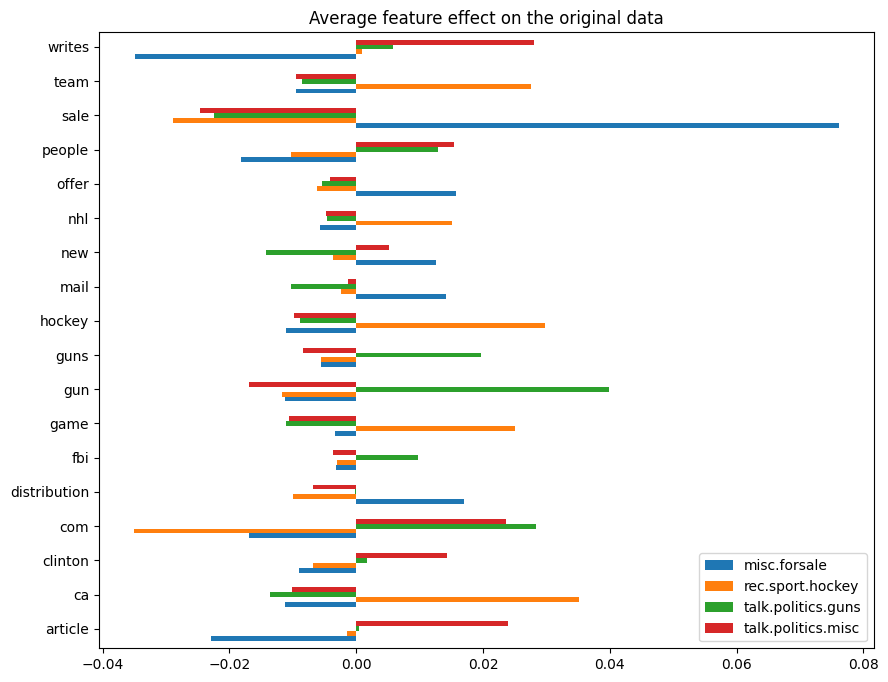

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

In [40]:
from sklearn import metrics
from sklearn.utils.extmath import density

def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier

results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),

):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 0.169s
test time:  0.00104s
accuracy:   0.904

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.001s
test time:  0.133s
accuracy:   0.886

Complement naive Bayes
________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1)
train time: 0.002s
test time:  0.0s
accuracy:   0.917



In [46]:
import re

def tokenize(doc):
    """Extract tokens from doc using a regex."""
    # Tokenize and ensure a list of lowercase words
    return [tok.lower() for tok in re.findall(r"\w+", doc)]

def count_vectorize(corpus):
    # Step 1: Tokenize each document
    tokenized_corpus = [tokenize(doc) for doc in corpus]

    # Step 2: Build a vocabulary (sorted list of unique words)
    vocabulary = sorted(set(word for tokens in tokenized_corpus for word in tokens))

    # Step 3: Count occurrences of each word in each document
    count_matrix = []
    for tokens in tokenized_corpus:
        row = [tokens.count(word) for word in vocabulary]
        count_matrix.append(row)
    
    return vocabulary, count_matrix

# Example usage
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Unigram vectorization
vocabulary, count_matrix = count_vectorize(corpus)

print("Vocabulary:", vocabulary)
print("Count Matrix:")
for row in count_matrix:
    print(row)

Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Count Matrix:
[0, 1, 1, 1, 0, 0, 1, 0, 1]
[0, 2, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 1, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 0, 0, 1, 0, 1]


In [47]:
t0 = time()
vocabulary, count_matrix = count_vectorize(raw_data)
duration = time() - t0
print(f"done in {duration:.3f} s")

KeyboardInterrupt: 